Import

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
import nltk
from collections import Counter

In [17]:
# Loading data and gathering some initial info from the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Documents\Data sets\ElectronicsProductsPricingData.csv/ElectronicsProductsPricingData1.csv")
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


Data Cleaning

In [18]:
# Removing empty comlumns at the end of dataset
df = df.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'], axis=1)

# Removing columns that are irrelevant/difficult to leverage for our objectives
df = df.drop(['id', 'primaryCategories', 'sourceURLs', 'prices.sourceURLs', 'imageURLs', 'ean', 'asins', 'upc', 'keys',
             'manufacturer', 'manufacturerNumber'], axis=1)

In [19]:
df = df.rename(columns={'prices.amountMax':'MaxPrice', 'prices.amountMin':'MinPrice', 'prices.availability':'Availability', 
                        'prices.condition':'isNew', 'prices.currency':'Currency', 'prices.dateSeen':'DateSeen', 
                        'prices.isSale':'isSale', 'prices.merchant':'Merchant', 'prices.shipping':'Shipping', 'brand':'Brand',
                        'categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated', 'name':'Name', 
                        'weight':'Weight'})

In [20]:
df['Availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available'], dtype=object)

In [21]:
df['Availability'] = df['Availability'].map({'Yes':1, 'In Stock':1, 'TRUE':1, 'undefined':0, 'yes':1, 'Out Of Stock':0, 
                                             'Special Order':1, 'No':0, 'More on the Way':0, 'sold':0, 'FALSE':0, 'Retired':0, 
                                             '32 available':1, '7 available':1})

In [22]:
df['isNew'] = df['isNew'].map({'New':1, 'new':1, 'Seller refurbished':0, 'Used':0, 'pre-owned':0, 'Refurbished':0, 
                               'Manufacturer refurbished':0, 'New other (see details)':1, 'refurbished':0, 
                               'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"':1,
                               '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties':1})

In [23]:
df['isSale'] = df['isSale'].map({False:0, True:1})

In [24]:
df['Shipping'] = df['Shipping'].fillna(0)

In [25]:
df['Shipping'] = df['Shipping'].map({'Expedited':1, 'Value':1, 'Standard':1, 'Free Shipping':0, 
                                     'Free Shippingon orders 35 and up':0, 'Free Expedited Shipping':0, 
                                     'Free Shipping on orders 35 and up':0, 'Free Expedited Shipping for most orders over $49':0, 
                                     'FREE':0, 'Freight':1, 'Free Shipping for this Item':0, 
                                     'Free Standard Shipping on Orders Over $49':0, 'Free Delivery':0, 
                                     'Shipping Charges Apply':1, 'Free Standard Shipping':0, 
                                     'Free Next Day Delivery (USA)':0}).fillna(1)

In [26]:
i = df[df['Weight']=='Electronics'].index
df = df.drop(i, axis=0)

In [27]:
i = df[df['Weight']=='http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=28,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=27,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=24,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=26,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=20,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=25,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=22,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=21,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=23,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=16,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=19,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=18,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=17,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=15,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=7,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=5,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=8,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=10,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=2,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=9,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=6,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=3,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=4,http://www.ebay.com/itm/Kenwood-DDX9703S-2-DIN-DVD-CD-Player-6-95-LCD-Android-iPhone-HD-Radio-Bluetooth/182198714536,http://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843,http://www.ebay.com/itm/KENWOOD-DDX9703S-2-DIN-6-95-TV-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/292166538126,http://www.ebay.com/itm/Kenwood-DDX9703S-CarPlay-Android-Stereo-2DIN-In-Dash-DVD-CD-AMFM-6-95-Touch-NEW-/132239386357,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843?hash=item2ef26e0bb3:g:x7sAAOSwwo1Xfwa0&vxp=mtr,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468?hash=item51f9f65d2c:g:BJAAAOSw1~JZPvFJ,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/162546830375?hash=item25d88bcc27:g:~UIAAOSw8GtZOdR6,http://www.frys.com/product/8773411,http://frys.com/product/8773411,https://www.amazon.ca/Kenwood-DDX9703S-DVD-receiver/dp/B01GITWG5S,https://www.walmart.com/ip/Kenwood-DDX9703S-6.95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274'].index
df = df.drop(i, axis=0)

At this point, most of the cleaning work is done, however there are still a couple data type errors remaining in the dataset. Namely, that DateSeen, DateAdded, and DateUpdated are all stored as strings instead of as dates/datetime objects.

In [28]:
def dateCleaner(date):
    date = str(date).split(',')[0]
    cleaned_date = datetime.fromisoformat(date[:-1]).astimezone(timezone.utc)
    return cleaned_date

In [29]:
df['DateSeen'] = df['DateSeen'].map(dateCleaner)
df['DateAdded'] = df['DateAdded'].map(dateCleaner)
df['DateUpdated'] = df['DateUpdated'].map(dateCleaner)

In [30]:
def poundsToNum(pounds):
    if type(pounds)==str:   
        pounds = pounds.split()
        num = float(pounds[0])
        unit = pounds[-1]
        if unit in ['oz', 'ounces']:
            num = num/16
        pounds = num
    return pounds

In [31]:
df['Weight'] = df['Weight'].map(poundsToNum)

with all that done we should be able to proceed into our EDA phase. Before that lets take a final look at our cleaned dataset for reference.

In [32]:
df.head()

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
0,104.99,104.99,1,1,USD,2017-03-30 00:30:00+00:00,0,Bestbuy.com,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 06:30:51+00:00,2018-05-12 13:29:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,32.8
1,69.00,64.99,1,1,USD,2017-12-14 00:30:00+00:00,1,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
2,69.00,69.00,1,1,USD,2017-09-07 23:30:00+00:00,0,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
3,69.99,69.99,1,1,USD,2017-10-09 23:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0
4,66.99,66.99,1,1,USD,2017-08-28 01:30:00+00:00,0,Bestbuy.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 08:44:56+00:00,2018-06-13 14:09:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,14.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 7248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   MaxPrice      7216 non-null   float64            
 1   MinPrice      7216 non-null   float64            
 2   Availability  7216 non-null   int64              
 3   isNew         7216 non-null   int64              
 4   Currency      7216 non-null   object             
 5   DateSeen      7216 non-null   datetime64[ns, UTC]
 6   isSale        7216 non-null   int64              
 7   Merchant      7216 non-null   object             
 8   Shipping      7216 non-null   float64            
 9   Brand         7216 non-null   object             
 10  Categories    7216 non-null   object             
 11  DateAdded     7216 non-null   datetime64[ns, UTC]
 12  DateUpdated   7216 non-null   datetime64[ns, UTC]
 13  Name          7216 non-null   object             
 14  Weight  

Exploratory Data Analysis

<AxesSubplot:>

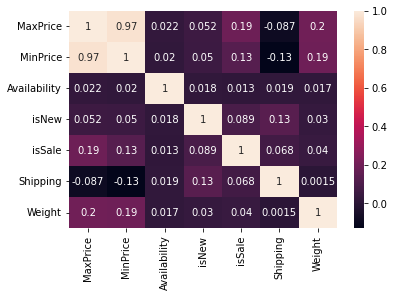

In [34]:
# heatmap for numeric data only
sub_df = df.drop(['Currency', 'DateSeen', 'Merchant', 'Brand', 'Categories', 'DateAdded', 'DateUpdated', 'Name'], axis=1)
corr = sub_df.corr()
sns.heatmap(corr, annot=True)

Question 1

how the condition or new-ness of the product can affect its pricing strategy.

While I couldn't find a direct implementation of it in python, the seaborn library does allow us to achieve a similar result by playing around with the arguments of its kdeplot() function.

<AxesSubplot:xlabel='MaxPrice', ylabel='Density'>

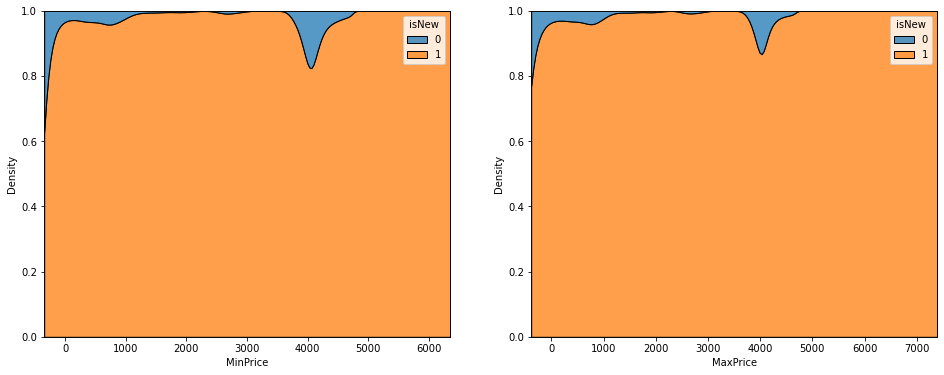

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
data = df[['MinPrice', 'MaxPrice', 'isNew']]
sns.kdeplot(data=data, x='MinPrice', hue='isNew', multiple='fill', ax=ax[0])
sns.kdeplot(data=data, x='MaxPrice', hue='isNew', multiple='fill', ax=ax[1])

Lets interpret the graphs above, the way you are supposed to look at a conditional density plot is by the rough percentages that are covered by each color for a given MinPrice and MaxPrice value. For example, at around $4000 roughly 20% of products are old products (represented by the blue region) and the remaining 80% are new products.

In [36]:
df[(df['MinPrice']>3900) & (df['MinPrice']<4100)] # 1428 is the outlier behind that sudden jump

,MaxPrice,MinPrice,Availability,isNew,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,Weight
1421,3959.99,3959.99,1,1,USD,2017-07-08 22:30:00+00:00,1,Bestbuy.com,1.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
1428,3989.99,3989.99,1,0,USD,2017-08-28 08:30:00+00:00,1,compucell.tech,0.0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 02:06:58+00:00,2018-06-13 14:09:16+00:00,Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...,7.69
2290,4999.99,4096.00,0,1,USD,2017-11-08 14:30:00+00:00,1,Beach Camera,1.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50
2297,3999.99,3999.99,1,1,USD,2017-05-31 13:30:00+00:00,0,Bestbuy.com,0.0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 04:07:00+00:00,2018-06-13 14:20:10+00:00,Sony - 55 Class - OLED - A1E Series - 2160p - ...,63.50


Question 2

Pondered whether or not the date and time that the product was seen had anything to do with the pricing of said product across merchants. Here, we will be going a little further and also considering whether or not the data the product was added and updated to be of any help as well.

In [37]:
def calcDiff(date):
    diff = date - base
    return diff.days

In [38]:
data = df.sort_values(by='DateSeen', ascending=False)
data = data[['DateSeen', 'Merchant', 'MinPrice']]
base = list(data.sort_values('DateSeen')['DateSeen'])[0]
data['DateSeen'] = data['DateSeen'].map(calcDiff)

In [39]:
corr_df = data[['DateSeen', 'MinPrice']]
corr_df.corr()

,DateSeen,MinPrice
DateSeen,1.000000,0.027874
MinPrice,0.027874,1.000000


As can be seen in the correlations above, it appears that date seen has an extremely small impact on the minimum price of products. Regardless, we can take a further look into things by considering how these prices change over time.

Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

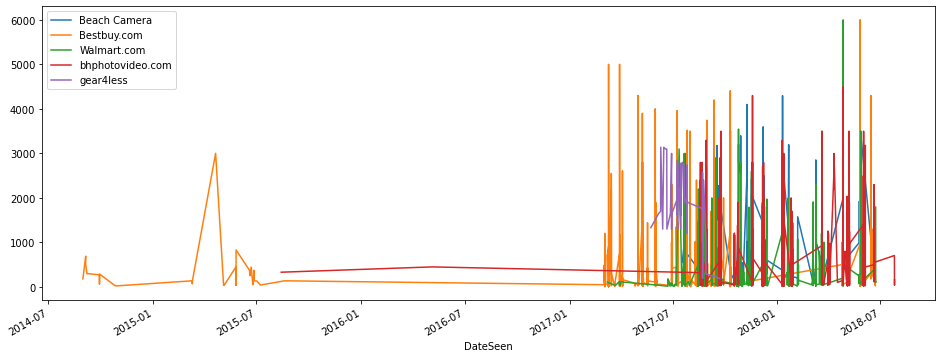

In [40]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateSeen', ascending=False)
data = data[['DateSeen', 'Merchant', 'MinPrice']].set_index('DateSeen')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

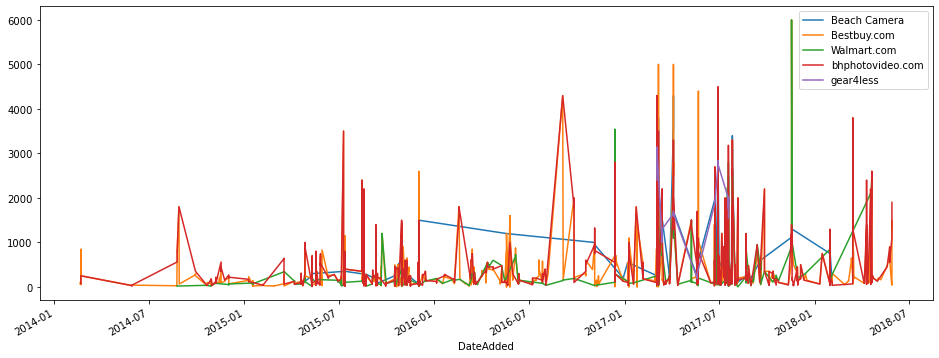

In [41]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateAdded', ascending=False)
data = data[['DateAdded', 'Merchant', 'MinPrice']].set_index('DateAdded')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Merchant
Beach Camera        AxesSubplot(0.125,0.2;0.775x0.68)
Bestbuy.com         AxesSubplot(0.125,0.2;0.775x0.68)
Walmart.com         AxesSubplot(0.125,0.2;0.775x0.68)
bhphotovideo.com    AxesSubplot(0.125,0.2;0.775x0.68)
gear4less           AxesSubplot(0.125,0.2;0.775x0.68)
Name: MinPrice, dtype: object

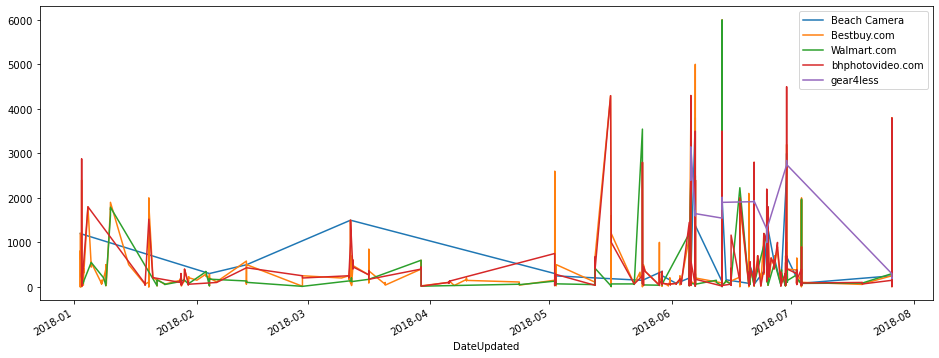

In [42]:
fig, ax = plt.subplots(figsize=(16,6))
data = df.sort_values(by='DateUpdated', ascending=False)
data = data[['DateUpdated', 'Merchant', 'MinPrice']].set_index('DateUpdated')
top5 = data.groupby('Merchant').sum().sort_values('MinPrice', ascending=False).head(5)
data[data['Merchant'].isin(list(top5.index))].groupby('Merchant')['MinPrice'].plot(legend=True)

Question 3

In that it wants to take a look at the pricing strategy different merchants use to sell the same products.

Once again, we will only be considering the top 5 products and the average price at which merchants who sell these products price them.

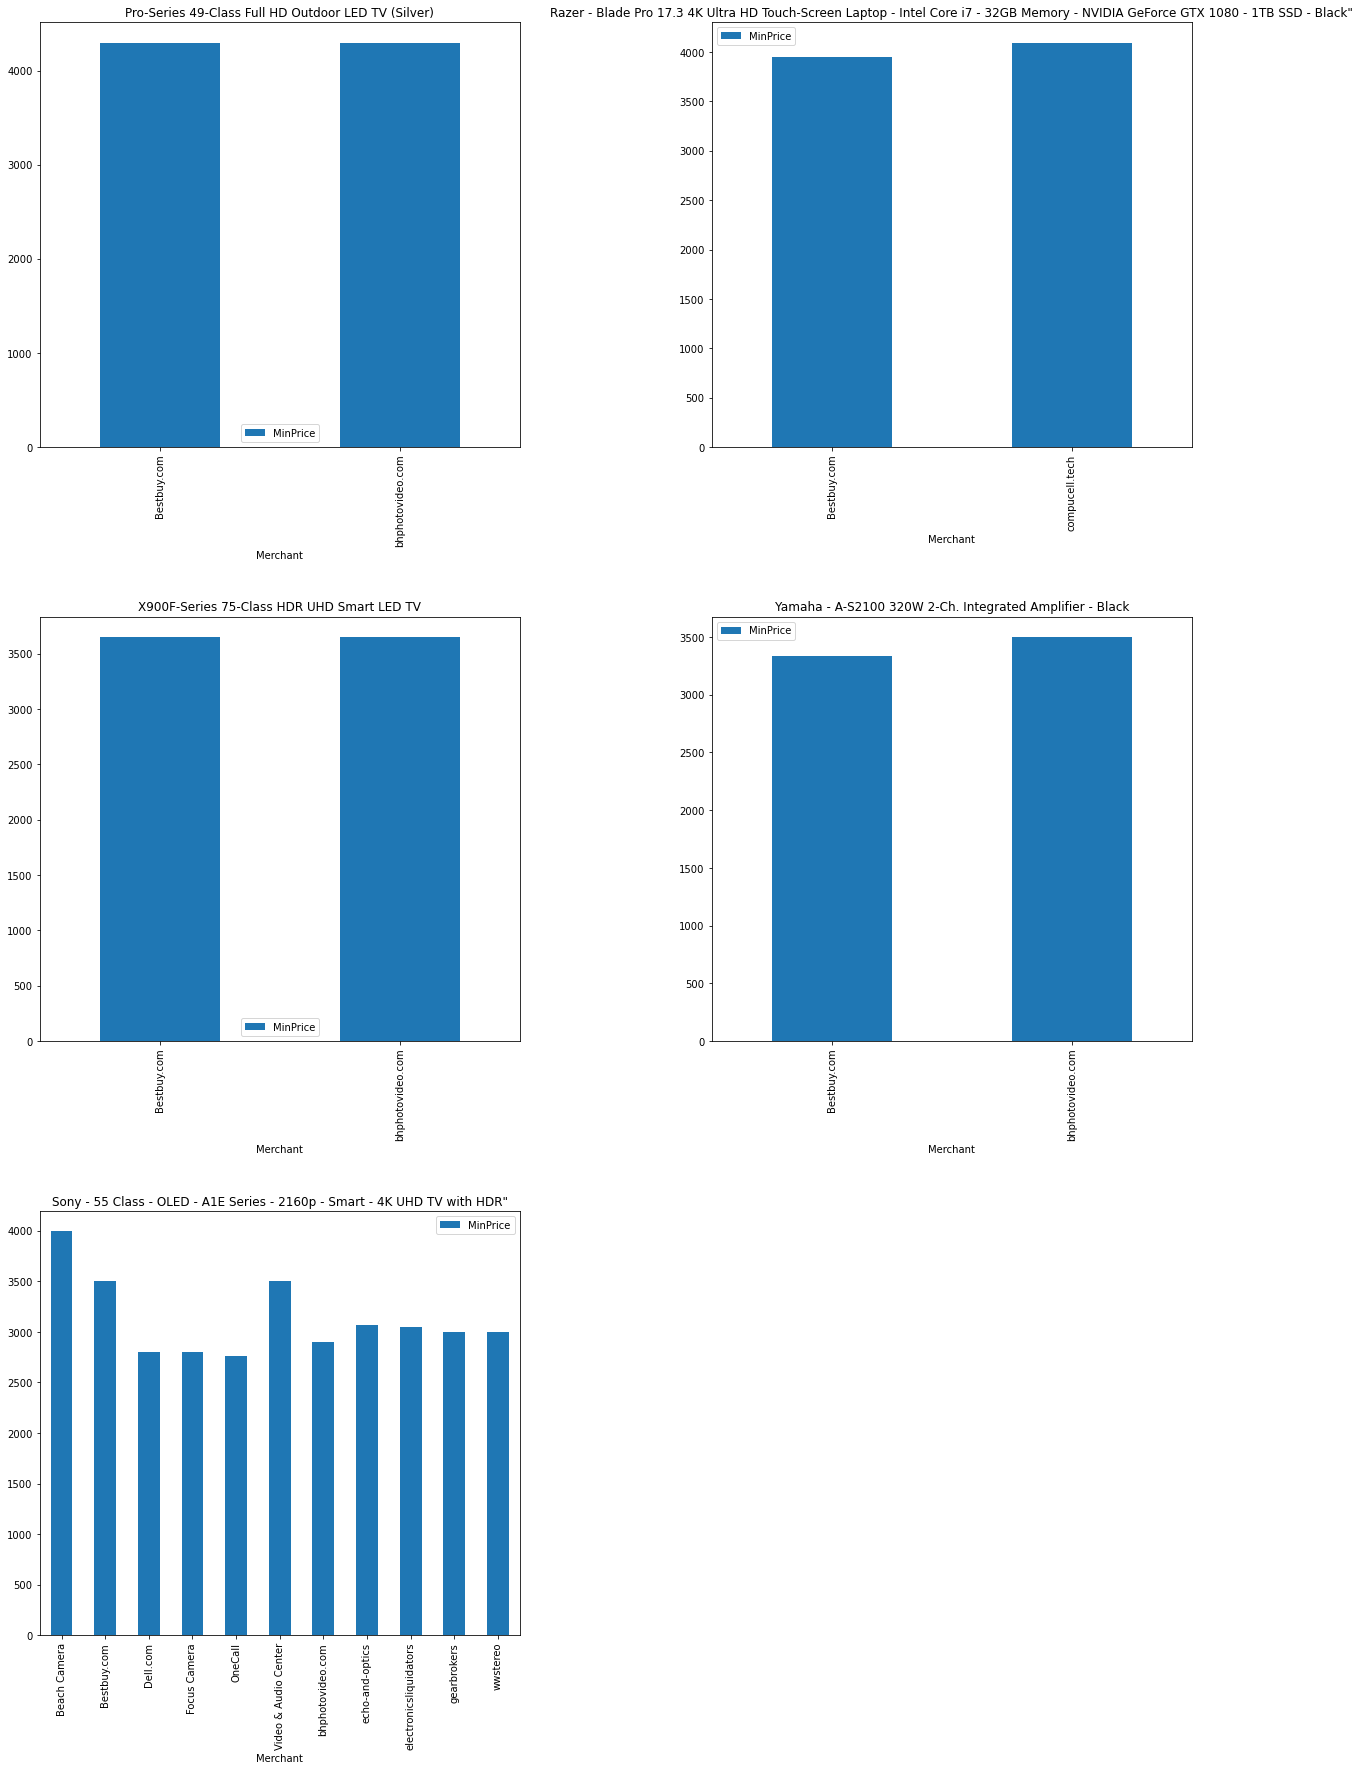

In [43]:
fig, ax = plt.subplots(3,2, figsize=(20,28))
data = df[['Name', 'MinPrice', 'Merchant']]
top5 = data.groupby('Name').mean().sort_values('MinPrice', ascending=False).head(5).index
plot_df1 = data[data['Name']==top5[0]].groupby('Merchant').mean()
plot_df2 = data[data['Name']==top5[1]].groupby('Merchant').mean()
plot_df3 = data[data['Name']==top5[2]].groupby('Merchant').mean()
plot_df4 = data[data['Name']==top5[3]].groupby('Merchant').mean()
plot_df5 = data[data['Name']==top5[4]].groupby('Merchant').mean()

plot_df1.plot.bar(y='MinPrice', use_index=True, title=top5[0], ax=ax[0,0])
plot_df2.plot.bar(y='MinPrice', use_index=True, title=top5[1], ax=ax[0,1])
plot_df3.plot.bar(y='MinPrice', use_index=True, title=top5[2], ax=ax[1,0])
plot_df4.plot.bar(y='MinPrice', use_index=True, title=top5[3], ax=ax[1,1])
plot_df5.plot.bar(y='MinPrice', use_index=True, title=top5[4], ax=ax[2,0])
fig.delaxes(ax[2,1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Question 4

largely owing to the fact that it wants to find out how product categories impact pricing, however categories are stored pretty haphazardly in this dataset, as you can see in the cell below

In [44]:
data = df[['Categories', 'MinPrice']]
data.groupby('Categories').mean().sort_values('MinPrice', ascending=False)


,MinPrice
Categories,
"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",4295.784000
"Computers/Tablets & Networking,Computers & Accessories,PC Laptops & Netbooks,Laptops & Netbooks,Traditional Laptops,Computers & Tablets,Electronics,Laptops,All Laptops,PC Laptops",3975.990000
"LED & LCD TVs,TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",3648.995000
"Integrated Amplifiers,Power Amplifiers,Receivers Amplifiers,Electronics,Receivers & Amplifiers,Home Audio,TVs Entertainment,Musical Instruments,Amplifiers,Audio",3374.972500
"TVs & Electronics,4K Ultra HD TVs,TV, Video & Home Audio,Electronics,4K Sony TVs,TVs Entertainment,Televisions,TV & Home Theater,All Flat-Panel TVs,OLED TVs,All TVs,Consumer Electronics,TVs,TV & Video,Smart TVs by Brand,4K TVs by Brand,Television & Video,Sony Smart TVs,4K Ultra HDTVs",3204.793462
...,...
"Computers,Wall Chargers & Power Adapters,Other Camcorder Accessories,Wall Chargers,Cell/Smart Phones Accessories,Electronics,Cell Phone Accessories,Cell/Smart Phone Accessories,Accessories,Wall Chargers uaedvcevatubu,Mobile Power,Cell/Smart Phone Chargers,Multipurpose Batteries & Power,Wall Chargers fcxxdxcqvyfwsq,Camcorder Accessories,Electrical,Cables & Adapters,Chargers & Cradles,Chargers,Frys,Cell Phones,Home Electronics,Adapters, Cables & Chargers,Headphones,Consumer Electronics,Power Cables & Connectors,Power Accessories,Cell Phones & Accessories,Mobile Power zxqyvbwuwyydcq",15.451200
"Tools,Automotive,Batteries, Chargers & Jumper Cables,Car Battery Chargers,Home & Garden,Household Supplies & Cleaning,Other Home Cleaning Supplies,electronics,Cell Phones,Cell Phone Accessories,Cell Phone Batteries & Power,Portable Chargers/Power Packs",14.923333
"Smart Home,Smart Electronics,Bluetooth Speakers,Electronics,Home Audio & Theater,Home Audio,All Home Speakers,Speaker Systems,Audio,Bluetooth & Wireless Speakers,Stereos",13.953333


Those were some of the top categories by minimum price, as you can see their categories are rather lenghty and we are going to need to find a way to deal with them if we want to draw any meaningful conclusion from them.

Fortunately, we can leverage some natural language processing to make our lives significantly easier.

In [45]:
def summarizer(categories):
    categories = categories.replace(',', ' ')
    tokens = nltk.word_tokenize(categories)
    tagged = nltk.pos_tag(tokens)
    
    count_list = []
    for i in range(len(tagged)):
        if tagged[i][1] == 'NNP':
            count_list.append(tagged[i])
            
    counts = Counter(word for word,tag in count_list)
    return max(counts, key=counts.get)

In [47]:
plot_data = data.groupby('Categories').sum().sort_values('MinPrice', ascending=False).head(10)

<AxesSubplot:xlabel='Categories'>

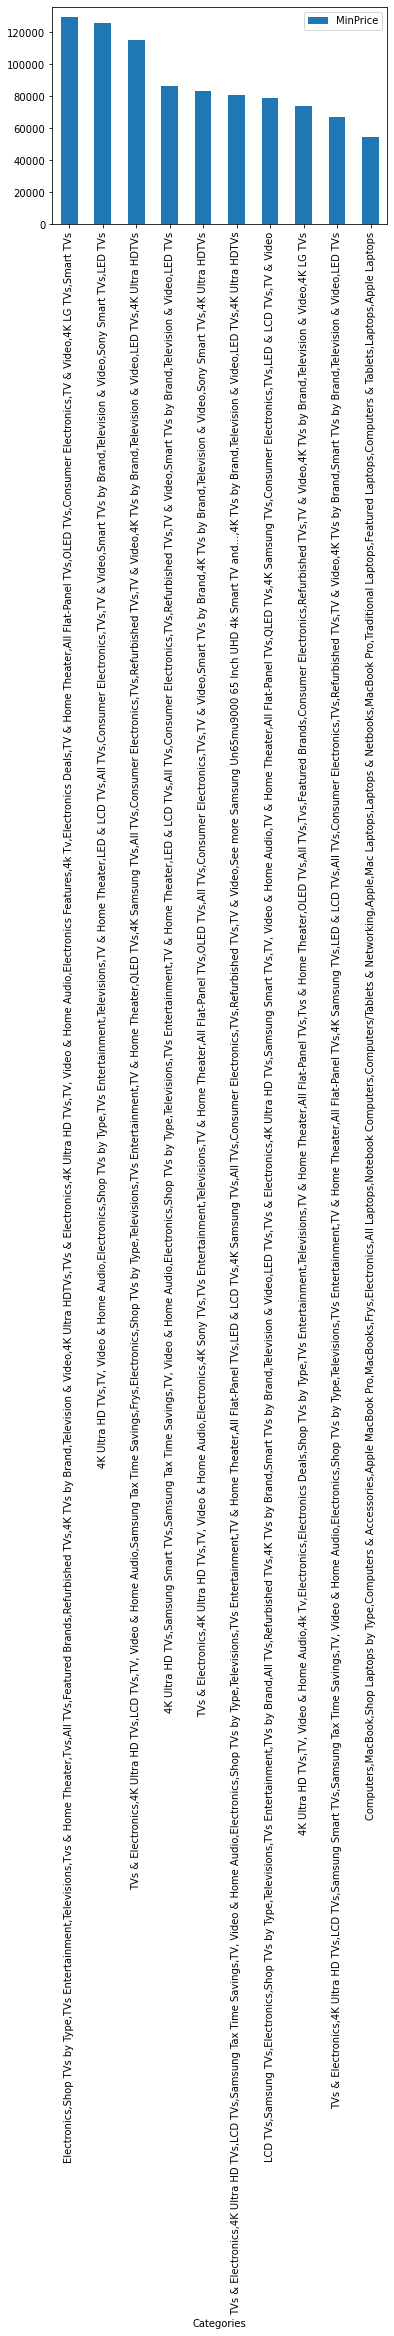

In [48]:
plot_data.plot.bar(y='MinPrice', use_index=True)

As we can see from the results above, it appears that TVs, laptops and cameras are the most popular and expensive categories. As TVs are most likely the most expensive product from the range of products in the dataset.